In [1]:
import numpy as np
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("Total Active Case.xlsx")

In [3]:
data.head()

,Date,New_Positive,Flag_Varian,Total_kasus,Sembuh,Meninggal_Dunia
0,2020-03-02,2,covid,2,0,0
1,2020-03-03,0,covid,2,0,0
2,2020-03-04,0,covid,2,0,0
3,2020-03-05,0,covid,2,0,0
4,2020-03-06,2,covid,4,0,0


In [4]:
data.index = pd.to_datetime(data['Date'])
data.drop(columns='Date',inplace=True)
data.head()

,New_Positive,Flag_Varian,Total_kasus,Sembuh,Meninggal_Dunia
Date,,,,,
2020-03-02,2,covid,2,0,0
2020-03-03,0,covid,2,0,0
2020-03-04,0,covid,2,0,0
2020-03-05,0,covid,2,0,0
2020-03-06,2,covid,4,0,0


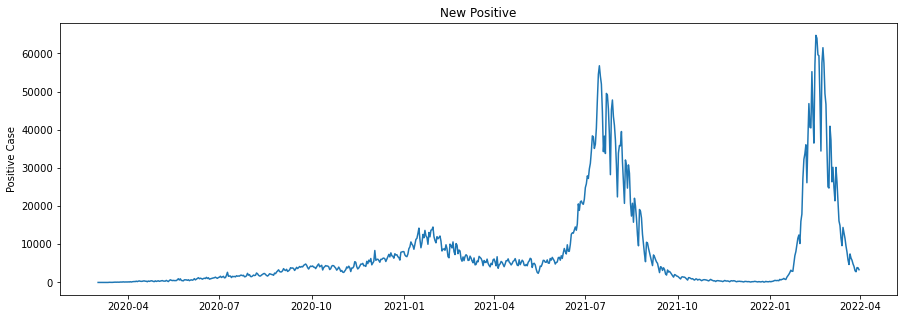

In [5]:
plt.figure(figsize=(15,5));
plt.plot(data.index,data['New_Positive']);
plt.ylabel('Positive Case');
plt.title('New Positive');
plt.plot();

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Flag_Varian'] = data['Flag_Varian'].str.split().str[0]
data['Flag_Varian']= label_encoder.fit_transform(data['Flag_Varian'])
data['Flag_Varian'].value_counts()

2    426
0    208
1    125
Name: Flag_Varian, dtype: int64

# Check for Stationarity

In [7]:
from statsmodels.tsa.stattools import adfuller
def adf_test(data):
     dftest = adfuller(data, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(data['New_Positive'])

1. ADF :  -4.071800208842782
2. P-Value :  0.001077860315558779
3. Num Of Lags :  17
4. Num Of Observations Used For ADF Regression: 741
5. Critical Values :
	 1% :  -3.4392057325732104
	 5% :  -2.8654483492874236
	 10% :  -2.5688512291811225


If p< 0.05 ; Data is stationary
if p>0.05; Data is not stationary

    Because P-value< 0.05 Data is Stationary

# ARIMA

In [8]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(data['New_Positive'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.071800
p-value: 0.001078


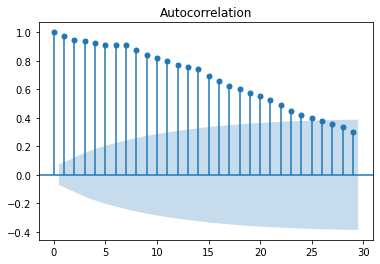

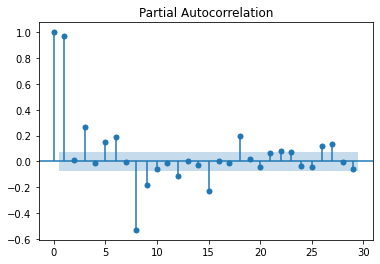

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig1=plot_acf(data['New_Positive'].dropna())
fig2=plot_pacf(data['New_Positive'].dropna())

autocorelation plot

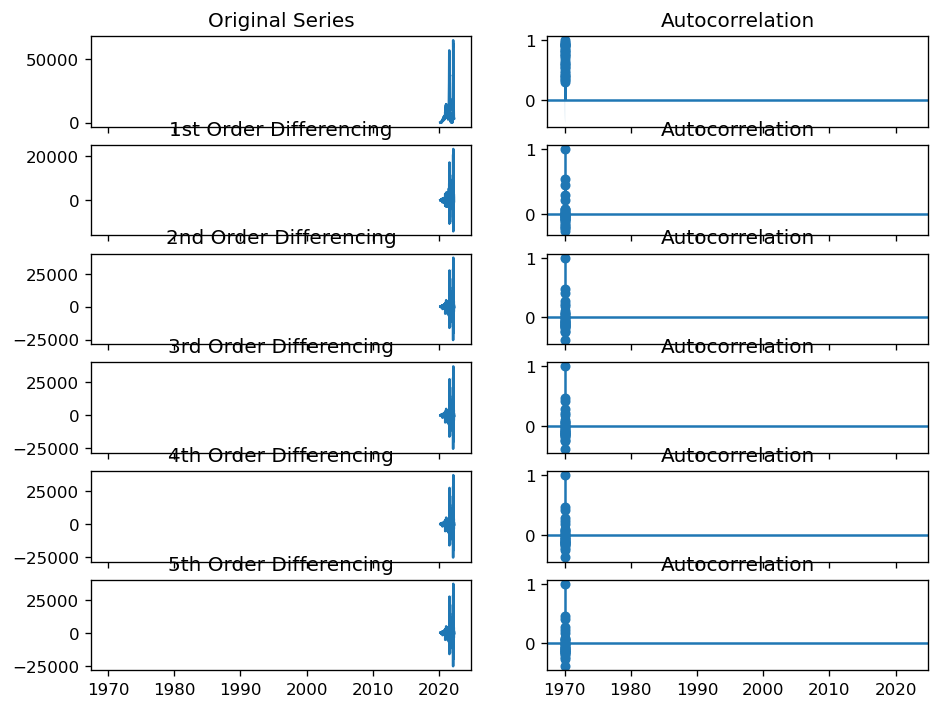

In [10]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(6, 2, sharex=True)
axes[0, 0].plot(data['New_Positive']); axes[0, 0].set_title('Original Series')
plot_acf(data['New_Positive'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data['New_Positive'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data['New_Positive'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data['New_Positive'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data['New_Positive'].diff().diff().dropna(), ax=axes[2, 1])
# 3rd Differencing
axes[3, 0].plot(data['New_Positive'].diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(data['New_Positive'].diff().diff().dropna(), ax=axes[3, 1])
# 4th Differencing
axes[4, 0].plot(data['New_Positive'].diff().diff()); axes[4, 0].set_title('4th Order Differencing')
plot_acf(data['New_Positive'].diff().diff().dropna(), ax=axes[4, 1])
# 5th Differencing
axes[5, 0].plot(data['New_Positive'].diff().diff()); axes[5, 0].set_title('5th Order Differencing')
plot_acf(data['New_Positive'].diff().diff().dropna(), ax=axes[5, 1])

plt.show()

In [11]:
exogenous_features = [
       'Flag_Varian','Total_kasus','Sembuh','Meninggal_Dunia'
    ]

# Training and Testing

In [12]:
# data.drop(columns='Flag Varian',inplace=True)

In [13]:
train=data.iloc[:-152]
test=data.iloc[-152:]
print(train.shape,test.shape)

(607, 5) (152, 5)


In [14]:
test

,New_Positive,Flag_Varian,Total_kasus,Sembuh,Meninggal_Dunia
Date,,,,,
2021-10-31,523,0,4244358,497,17
2021-11-01,403,0,4244761,784,18
2021-11-02,612,0,4245373,868,34
2021-11-03,801,0,4246174,814,24
2021-11-04,628,0,4246802,837,19
...,...,...,...,...,...
2022-03-27,3077,1,5998953,12499,100
2022-03-28,2798,1,6001751,10301,104
2022-03-29,3895,1,6005646,10092,108


# ARIMAX

In [15]:
# model = auto_arima(train.New_Positive, exogenous=train.Flag_Varian.values.reshape(-1, 1), trace=True, error_action="ignore", suppress_warnings=True)
# model.fit(train.New_Positive, exogenous=train.Flag_Varian.values.reshape(-1, 1),order=(5,1,5))

In [16]:
from pmdarima.arima import auto_arima
model = auto_arima(train.New_Positive, exogenous=train[exogenous_features],trace=True, error_action="ignore", suppress_warnings=True)
model.fit(train.New_Positive, exogenous=train[exogenous_features])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10839.748, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10863.563, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10861.725, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10860.887, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10862.643, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10847.527, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10842.777, Time=0.64 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10767.779, Time=0.88 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10829.713, Time=0.31 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=10792.617, Time=0.83 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10807.102, Time=1.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10763.981, Time=0.97 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10842.946, Time=0.44 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=10785.001, Time=1.07 sec
 ARIMA(1,1,4)(0,0,0

ARIMA(order=(4, 1, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [17]:
forecast = model.predict(n_periods=len(test), exogenous=test[exogenous_features],order=(4,1,5))

C:\Users\Bryan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [18]:
test["Forecast_ARIMAX"] = forecast

C:\Users\Bryan\AppData\Local\Temp/ipykernel_34336/3557163255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Forecast_ARIMAX"] = forecast


<AxesSubplot:xlabel='Date'>

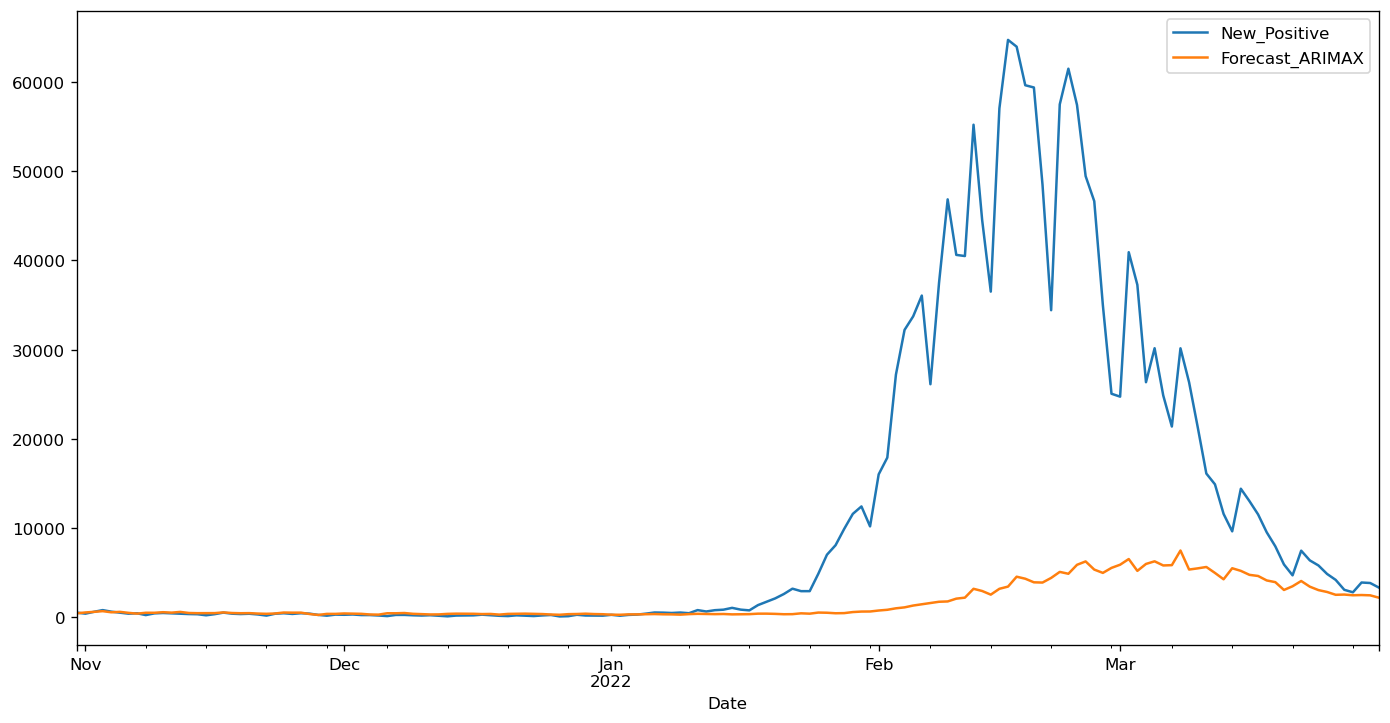

In [19]:
test[["New_Positive", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

In [20]:
import pmdarima as pmd
def arimamodel(timeseriesarray):
    autoarima_model=pmd.auto_arima(timeseriesarray,
                                   start_p=1,
                                   start_q=1,
                                   test="adf",
                                   trace=True)
    return autoarima_model

In [21]:
arima_model = arimamodel(data['New_Positive'])
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=14173.273, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=16404.235, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=14171.437, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=15523.678, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16680.387, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=14173.348, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=14149.911, Time=0.30 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=14125.816, Time=0.23 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=14124.559, Time=0.11 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=14126.398, Time=0.16 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=14120.128, Time=0.38 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=14109.413, Time=0.53 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=14113.885, Time=0.19 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=14025.501, Time=0.87 sec
 ARIMA(4,0,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  759
Model:               SARIMAX(5, 0, 2)   Log Likelihood               -7004.465
Date:                Tue, 19 Apr 2022   AIC                          14024.930
Time:                        08:59:36   BIC                          14061.986
Sample:                             0   HQIC                         14039.201
                                - 759                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1039      0.022     51.314      0.000       1.062       1.146
ar.L2         -1.2240      0.032    -38.769      0.000      -1.286      -1.162
ar.L3          1.2346      0.027     46.517      0.000       1.183       1.287
ar.L4         -0.4547      0.029    -15.724      0.000      -0.511      -0.398
ar.L5          0.3137      0.019     16.713      0.000       0.277       0.350
ma.L1         -0.1075      0.009    -12.105      0.000      -0.125      -0.090
ma.L2          0.9646      0.008    116.323      0.000       0.948       0.981
sigma2      6.673e+06   9.21e-10   7.24e+15      0.000    6.67e+06    6.67e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.77   Jarque-Bera (JB):              7235.85
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):             138.62   Skew:                             1.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.2e+31. Standard errors may be unstable.
"""

In [22]:
model=

SyntaxError: invalid syntax (Temp/ipykernel_34336/2007613200.py, line 1)

In [ ]:
# forecast = model.predict(n_periods=len(test), exogenous=test.Flag_Varian.values.reshape(-1, 1),order=(1,0,1))
# test["Forecast_ARIMAX"] = forecast

In [ ]:
forecast = model.predict(data['New_Positive'],order=(1,0,1))
test["Forecast_ARIMAX"] = forecast

In [ ]:
test[["New_Positive", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
# model=ARIMA(train['New_Positive'],order=(4,1,2))
# model=model.fit(disp=0)
# model.summary()

In [ ]:
# modeltest=ARIMA(test['New_Positive'],order=(4,1,2))
# modeltest=modeltest.fit()
# modeltest.summary()

In [ ]:
# start=len(train)
# end=len(train)+len(test)-1
# pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
# pred.plot(legend=True)
# test['New Positive'].plot(legend=True)

In [ ]:
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# test['New Positive'].mean()
# rmse=sqrt(mean_squared_error(pred,test['New Positive']))
# print(rmse)

In [ ]:
# train['New Positive'].mean()

In [ ]:
# data.dtypes

In [ ]:
# import statsmodels.api as sm
# data['const']=1
# model1=sm.OLS(endog=data['New Positive'],exog=data['Flag Varian'])
# result1=model1.fit()
# print(result1.summary())

In [ ]:
# data['diffS']=data['New Positive'].diff()
# data['diffM']=data['Flag Varian'].diff()
# model2=sm.OLS(endog=data['diffS'].dropna(),exog=data[['diffM']].dropna())
# results2=model1.fit()
# print(results2.summary())